# Facial Segmentation

In [8]:
from torchvision import models
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import json
import segmentation_models_pytorch as smp
import torch
import pandas as pd
import numpy as np
import os
import cv2
import shutil
import functools

ENCODER = 'efficientnet-b3'
ENCODER_WEIGHTS = 'imagenet'
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [9]:
from utils import to_tensor,get_validation_augmentation
def predict(model,image_fp=None,image=None):
    val_aug = get_validation_augmentation()
    image_base = image if not image is None else cv2.imread(image_fp) 
    image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)
    # image_base = cv2.rotate(image_base, cv2.ROTATE_90_CLOCKWISE)
    image = cv2.resize(image_base, (320, 480))
    frame = val_aug(image=image)['image']
    frame = preprocessing_fn(frame)
    frame = to_tensor(frame)

    frame = torch.from_numpy(frame).unsqueeze(0)

    pr_mask = model.predict(frame).squeeze().numpy() # .transpose(1,2,0)
    pr_mask_full = cv2.resize(pr_mask, (image_base.shape[1], image_base.shape[0]))
    pr_mask_full = np.expand_dims(pr_mask_full, 2)
    transparency = 0.4
    pr_mask_tr = pr_mask_full*transparency

    # make a green overlay
    green = np.ones(image_base.shape, dtype=np.float64) * (1,0,0)

    # green over original image
    out = green * pr_mask_tr + image_base * (1.0 - pr_mask_tr) / 255
    out = np.clip(out, 0, 1)
    fig = plt.figure()
    plt.axis('off')
    im = plt.imshow(out)
    return pr_mask_full
    

(1200, 900, 1)

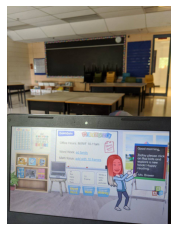

In [10]:
from glob import glob
imgs = glob("../data/test_images/*")
model = torch.load('../models/best_model_3.pth').to('cpu')
mask = predict(model,'../data/test_images/user665_3298.jpg')
mask.shape

(540, 960, 1)

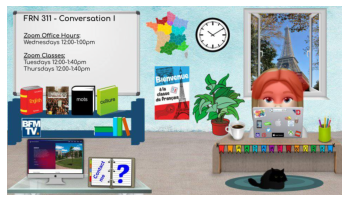

In [11]:
msk = predict(model,'../data/test_images/user699_4014.jpg')
msk.shape

(540, 960, 1)

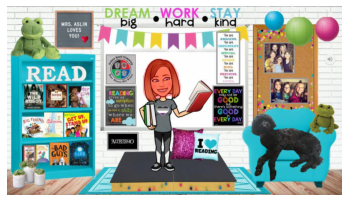

In [12]:
msk = predict(model,'../data/test_images/user781_2214.jpg')
msk.shape

(681, 1200, 1)

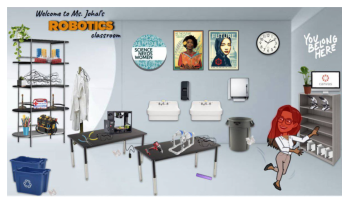

In [13]:
msk = predict(model,'../data/test_images/user851_3504.jpg')
msk.shape

(634, 1077, 1)

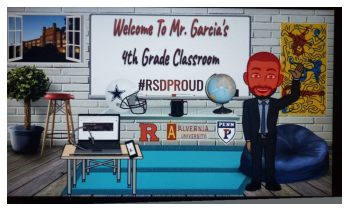

In [15]:
msk = predict(model,'../data/test_images/user681_3967.jpg')
msk.shape